# FITS Star Detection with Visualization

Min: 3759.00
Max: 22918.00
Mean: 9831.48
Std Dev: 3032.39


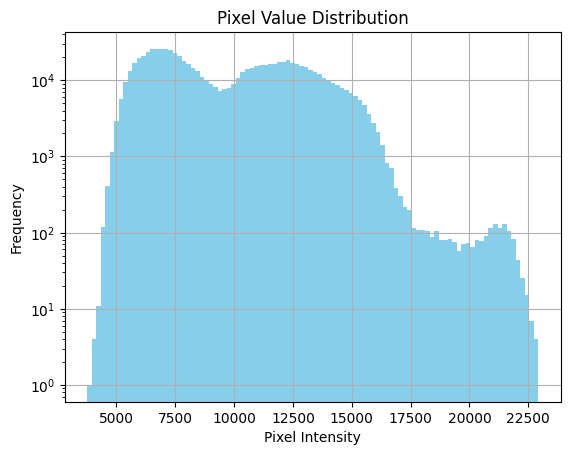

Using threshold: 1491.07
✅ Detected 82 sources.


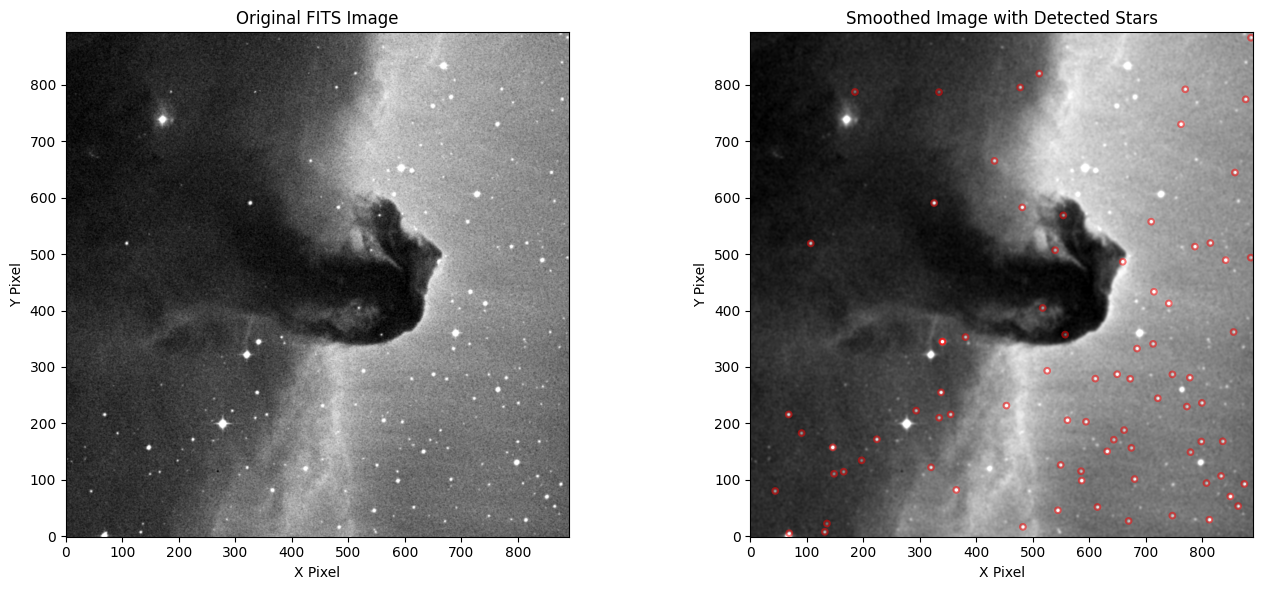

In [1]:
from astropy.io import fits
from astropy.visualization import ZScaleInterval, ImageNormalize
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import numpy as np

# Choose your file: Uncomment ONE option
# Option 1: Use online HorseHead Nebula image (fainter stars)
from astropy.utils.data import download_file
fits_url = "https://astropy.stsci.edu/data/tutorials/FITS-images/HorseHead.fits"
fits_file = download_file(fits_url, cache=True)

# Option 2: Use local M13 image (brighter star cluster) — download it manually and place in the same folder
# fits_file = "m13.fits"

# Step 1: Load FITS data
hdu = fits.open(fits_file)[0]
image_data = hdu.data

# Step 2: Show image pixel statistics
print(f"Min: {np.min(image_data):.2f}")
print(f"Max: {np.max(image_data):.2f}")
print(f"Mean: {np.mean(image_data):.2f}")
print(f"Std Dev: {np.std(image_data):.2f}")

# Step 3: Plot pixel intensity histogram
plt.hist(image_data.flatten(), bins=100, color='skyblue')
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.yscale("log")
plt.grid(True)
plt.show()

# Step 4: Smooth the image
smoothed = gaussian_filter(image_data, sigma=1.5)

# Step 5: Normalize image
norm = ImageNormalize(smoothed, interval=ZScaleInterval())

# Step 6: Source Detection (try a lower threshold for faint images)
mean, std = np.mean(smoothed), np.std(smoothed)
threshold = 0.5 * std  # You can lower this to 0.3 * std if needed
print(f"Using threshold: {threshold:.2f}")
finder = DAOStarFinder(fwhm=3.0, threshold=threshold)
sources = finder(smoothed - mean)

# Step 7: Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Original image
ax1.imshow(image_data, cmap="gray", origin="lower", norm=ImageNormalize(image_data, interval=ZScaleInterval()))
ax1.set_title("Original FITS Image")
ax1.set_xlabel("X Pixel")
ax1.set_ylabel("Y Pixel")

# Smoothed image + detected stars
ax2.imshow(smoothed, cmap="gray", origin="lower", norm=norm)
ax2.set_title("Smoothed Image with Detected Stars")
ax2.set_xlabel("X Pixel")
ax2.set_ylabel("Y Pixel")

# Step 8: Overlay detections
if sources is not None and len(sources) > 0:
    print(f"✅ Detected {len(sources)} sources.")
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    apertures = CircularAperture(positions, r=5.0)
    apertures.plot(color='red', lw=1.5, alpha=0.5, axes=ax2)
else:
    print("⚠️ No sources detected.")

plt.tight_layout()
plt.show()
